For this task the gold labels for the test set are available. I made a function below to ease the process of loading the dataset. Feel free to use it.

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.models import Model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")  # Set the warning filter to ignore

## Importing the dataset

In [2]:
import numpy as np
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) # besides loadng
                                                                                            #the data, I already flatten it into a vector
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test


## Splitting the Dataset to Train and Test

In [3]:
X_train, Y_train, X_test, Y_test = load_fashion_mnist() # you can use this function (copying the whole box) in your code to easily load the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


## Number of classes

In [4]:
num_classes = len(set(Y_train))
num_classes

10

## Scaling the data

In [5]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0


## Defining Machine learning Models and Calculating their Performance

Training KNN
Validation Accuracy: 0.8554
Precision: 0.8578152450755355
Recall: 0.8554
F1-score: 0.8546439722018904
              precision    recall  f1-score   support

     Class 0       0.77      0.85      0.81      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.73      0.82      0.77      1000
     Class 3       0.90      0.86      0.88      1000
     Class 4       0.79      0.77      0.78      1000
     Class 5       0.99      0.82      0.90      1000
     Class 6       0.66      0.57      0.61      1000
     Class 7       0.88      0.96      0.92      1000
     Class 8       0.97      0.95      0.96      1000
     Class 9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

Confusion Matrix:


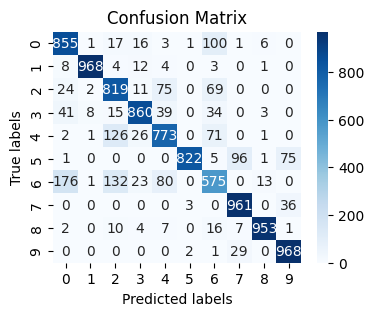

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

Training Random Forest
Validation Accuracy: 0.8778
Precision: 0.8766178449884281
Recall: 0.8778
F1-score: 0.8762345543808621
              precision    recall  f1-score   support

     Class 0       0.82      0.86     

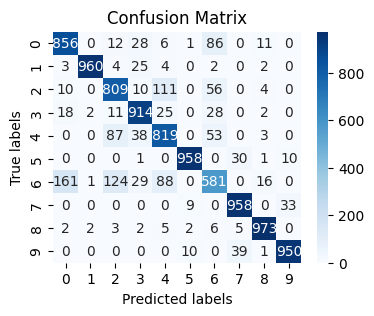

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.58      0.64      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Training SVM
Validation Accuracy: 0.8828
Precision: 0.882309111843896
Recall: 0.8828
F1-score: 0.8822648793630384
              precision    recall  f1-score   support

     Class 0       0.83      0.86      0.84      

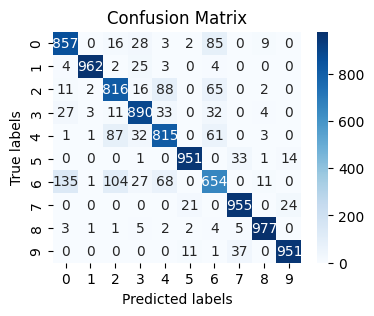

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate models
for name, model in models.items():
    print("Training", name)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, y_pred)
    report_dict = classification_report(Y_test, y_pred, output_dict=True)
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1 = report_dict['weighted avg']['f1-score']

    print("Validation Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    print(classification_report(Y_test, y_pred, target_names=target_names))



    # Confusion matrix
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

# Note: You might need to scale the input features for better performance of SVM.

## Neural Network Model

In [7]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

## Defining CNN Model

In [8]:
# Define input layer
input_layer = Input(shape=X_train[0].shape)

# Convolutional layers
conv1 = Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same')(input_layer)
conv1 = LeakyReLU(alpha=0.1)(conv1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
drop1 = Dropout(0.25)(pool1)

conv2 = Conv2D(64, (3, 3), activation='linear', padding='same')(drop1)
conv2 = LeakyReLU(alpha=0.1)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)
drop2 = Dropout(0.25)(pool2)

conv3 = Conv2D(128, (3, 3), activation='linear', padding='same')(drop2)
conv3 = LeakyReLU(alpha=0.1)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv3)
drop3 = Dropout(0.4)(pool3)

# Flatten layer
flatten = Flatten()(drop3)

# Dense layers
dense1 = Dense(128, activation='linear')(flatten)
dense1 = LeakyReLU(alpha=0.1)(dense1)
drop4 = Dropout(0.3)(dense1)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(drop4)

# Define the model
fashion_model = Model(inputs=input_layer, outputs=output_layer)

## Model Summary

In [9]:
fashion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                             

In [14]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.4 MB/s eta 0:00:00


In [16]:
import visualkeras
visualkeras.layered_view(fashion_model, to_file='fashion_model.png').show()

In [17]:
visualkeras.layered_view(fashion_model, to_file='fashion_model.png').show()

## Compiling the model

In [ ]:
fashion_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 15

## Training the Model

In [ ]:
history = fashion_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/15
938/938 [==============================] - 110s 110ms/step - loss: 0.5596 - accuracy: 0.7922 - val_loss: 0.3478 - val_accuracy: 0.8707
Epoch 2/15
938/938 [==============================] - 103s 110ms/step - loss: 0.3571 - accuracy: 0.8690 - val_loss: 0.2958 - val_accuracy: 0.8901
Epoch 3/15
938/938 [==============================] - 104s 111ms/step - loss: 0.3110 - accuracy: 0.8861 - val_loss: 0.2711 - val_accuracy: 0.9009
Epoch 4/15
938/938 [==============================] - 105s 111ms/step - loss: 0.2878 - accuracy: 0.8941 - val_loss: 0.2575 - val_accuracy: 0.9070
Epoch 5/15
938/938 [==============================] - 103s 110ms/step - loss: 0.2719 - accuracy: 0.8997 - val_loss: 0.2480 - val_accuracy: 0.9061
Epoch 6/15
938/938 [==============================] - 106s 113ms/step - loss: 0.2583 - accuracy: 0.9035 - val_loss: 0.2508 - val_accuracy: 0.9072
Epoch 7/15
938/938 [==============================] - 105s 112ms/step - loss: 0.2482 - accuracy: 0.9065 - val_loss: 0.2310 -

## Plotting the Loss and Accuracy

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc = accuracy[-1]
print(f'accuracy : {round(acc,4)}')

accuracy : 0.9204


Text(0, 0.5, 'Loss')

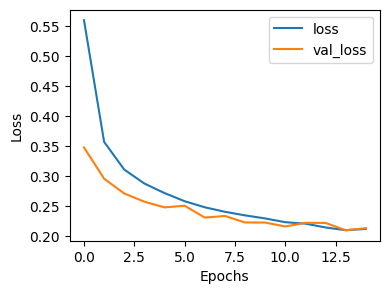

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

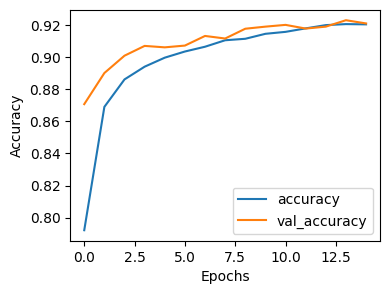

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Evaluating The Model

313/313 [==============================] - 6s 19ms/step


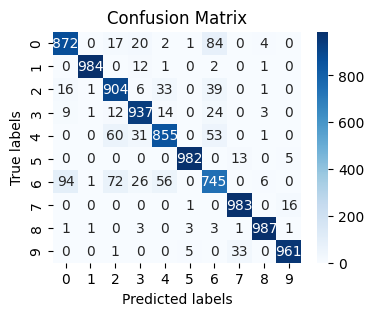

In [ ]:
y_pred_prob = fashion_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
Y_test = np.argmax(Y_test, axis=1)
# # Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
report_dict = classification_report(Y_test, y_pred, output_dict=True)
precision = report_dict['weighted avg']['precision']
recall = report_dict['weighted avg']['recall']
f1 = report_dict['weighted avg']['f1-score']

print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Validation Accuracy: 0.921
Precision: 0.9208192136170296
Recall: 0.921
F1-score: 0.9206730743585622


In [ ]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.88      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.85      0.90      0.88      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.89      0.85      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.78      0.74      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Comparing all the Models

(0.0, 1.0)

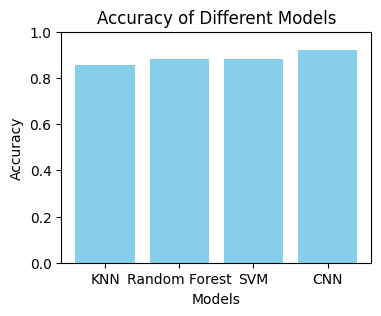

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their respective accuracies
model_names = ['KNN', 'Random Forest', 'SVM', 'CNN']
accuracies = [0.8554, 0.88, 0.88, 0.92]  # Sample accuracy values

# Plotting the accuracies
plt.figure(figsize=(4, 3))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
